# OpenStreetMap and Network analysis

OpenStreetMap(OSM) is a global collaborative (crowd-sourced) database and project that aims at creating a free editable map of the world containing of information about our environment. It contains data about streets, buildings, different services, and landuse The collected data is also basis for the map at openstreetmap.org. As a crowd-sourced database, it is freely available to retrieve data to visualize and analyse. Its global coverage, high data accuracy, and rich attributes became good resource for spatial analysis. Without accessing a foreign country government GIS data hub, you can access their geography boundary if it is on the OpenStreetMap. How convenient it is! 

OSM has more than 8 million registered users who contribute aounr 4 milliob changes daily. Its database contains data that is described by more than 7 billion nodes (that make up lines, polygons and other objects). 

While the most well-known side of OpenStreetMap is the map itself, that we have used as a background map, the project is much more than that. OSM's data can be used for many other purporses such as routing, geodocing, education, and research. OSM is also widely used for humanitarian response, e.g., in crisis areas (e.g. after natural disasters) and for fostering economic development. Reas more about humanitarian projects that use OSM data from the [Humanitarian OpenStreetMap Team (HOTOSM) website](https://www.hotosm.org/).

In this practice, you will learn 
1. how to load raw OpenStreetMap data on the Notebook and plot a map
2. Conduct a simple network alaysis: finding a shortest path

To explore OSM data and run network analysis, we will use **OSMnx** Python package. It allows us to retrieve OSM networks, construct, analyse, and visualise them. It can also fetch data about types of networks, Points of Interest, or more. This package development was lead by Prof. Geoff Boeing and you dan read its introduction at the reference. 

There is one more package, called **NetworkX**, to manipulate and analyse the street network data retrieved from OpenStreetMap. 
Let's install osmnx and import it. 

This practice is a part of Automating GIS Processes, MSc-level course at the Department of Geosciences & Geography, Univerisy of Helsinki. By Henrikki Tenkanen, Vuokko Heikinheimo, Håvard Wallin Aagesen, Christoph Fink, Kamyar Hasanzadeh   © Copyright 2016-2023.(https://autogis-site.readthedocs.io/en/2022/lessons/lesson-6/overview.html) 

Additional Reference: 
- OSMns: Python for Street Networks by Geoff Boeing (https://geoffboeing.com/2016/11/osmnx-python-street-networks/)
- OSMnx 1.7.1 Documentation (https://github.com/gboeing/osmnx)


## Install and Import modules

In [1]:
pip install osmnx

Note: you may need to restart the kernel to use updated packages.


In [2]:
import networkx as nx
import osmnx as ox

%matplotlib inline
ox.__version__

'2.0.6'

## Retrieving Data from OpenStreetMap

A useful feature of OSMnx is its easy-to-use tools to download OpenStreetMap data via the project's OverPass API. In this section, we will learn how to download and visualise the street network and additioanl data from OpenStreetMap covering an area of interest. 

### Street Network

The osmnx.graph module downloads data to construct a routable road network graph, based on a user-defined area of interst. This area of interest can be specified, for instance, usin g a place name, a bounding box, or a polygon. Here, we will use a placename for fetching data covering our campus, UW. 

In the place name query, OSMnx uses the Nominatim Geocoding API. This means that place neames should exist in the OpenStreetMap database. (Remember the in-class exercise Geocoding! We have used Nominatim Geocoding API in the exercise.) 

We will read an OSM street network using OSMnx's graph_from_place() function. plot_graph() uses matplotlib for plotting the graph. The function returns a (figure, axes) tuple, that can be used to modify the figure using all matplotlib functions. 

We can see that our graph contains nodes (the points) and edges (the lines) that connects those nodes to each other. 

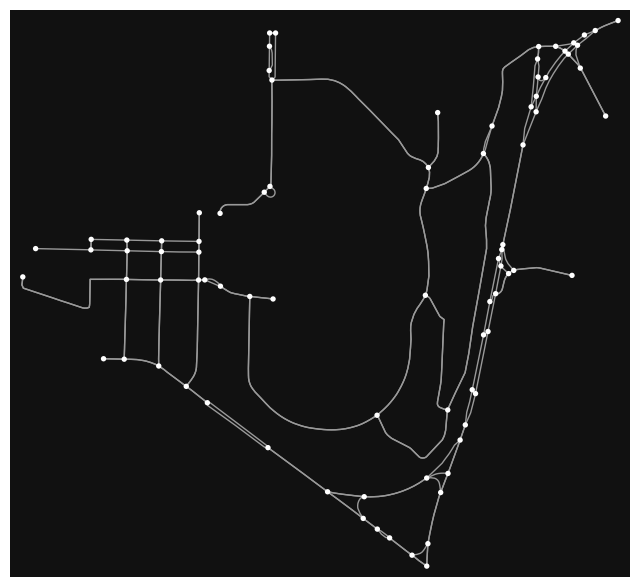

In [3]:
# download/model a street network for some city then visualize it
G = ox.graph_from_place("University of Washington, Seattle, Washington, USA", network_type="drive")
fig, ax = ox.plot_graph(G)

Note that the graph object G is decribing the area with network type: drive. The OSM database contains more network types such as pedestrian network, bike road, ... and you can pull out them.

OSMnx geocodes the query "place name" to retrieve the place boundaries of that city from the Nominatim API, retrieves the drivable street network data within those boundaries from the Overpass API, constructs a graph model, then simplifies/corrects its topology such that nodes represent intersections and dead-ends and edges represent the street segments linking them. 

- Download street networks anywhere in the world with a single line of code
- Download other infrastructure types, place boundaries, building footprints, and points of interest
- Download by city name, polygon, bounding box, or point/address + network distance
- Download drivable, walkable, bikeable, or all street networks

In [ ]:
# download/model a street network for some city then visualize it
G = ox.graph_from_place("University of Washington, Seattle, Washington, USA", network_type="walk")
fig, ax = ox.plot_graph(G)

You can download a street network by providing OSMnx any of the following (demonstrated in the examples below):

- a bounding box  
- a lat-long point plus a distance  
- an address plus a distance  
- a place name or list of place names (to automatically geocode and get the boundary of)  
- a polygon of the desired street network's boundaries  
- a .osm formatted xml file  

You can also specify several different network types:

- 'drive' - get drivable public streets (but not service roads)  
- 'drive_service' - get drivable streets, including service roads  
- 'walk' - get all streets and paths that pedestrians can use (this network type ignores one-way directionality)  
- 'bike' - get all streets and paths that cyclists can use  
- 'all' - download all non-private OSM streets and paths (this is the default network type unless you specify a different one)  
- 'all_private' - download all OSM streets and paths, including private-access ones  

## Convert a graph to GeoDataFrames
The street network we just downloaded is a graph, more specifically a networkx.MultiDiGraph. Its main purpose is to represent the topological relationships between nodes and the links (edges) between them. Sometimes, it is more convenient to have the underlying geodata in geopandas.GeoDataFrames. OSMnx comes with a convenient function that converts a graph into two geo-data frames, one for nodes, and one for edges: osmnx.graph_to_gdfs().

In [ ]:
nodes, edges = ox.graph_to_gdfs(G)
nodes.head()

In [ ]:
edges.head()

Nice! Now, as we can see, we have our graph as GeoDataFrames and we can plot them using the same functions and tools as we have used before.

## Place polygon
Let’s also plot the polygon that represents our area of interest (UW, Seattle). We can retrieve the polygon geometry using the [osmnx.geocode_to_gdf()](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=geocode_to_gdf(#osmnx.geocoder.geocode_to_gdf) function.

In [ ]:
# Get place boundary related to the place name as a geodataframe
area = ox.geocode_to_gdf("University of Washington, Seattle, Washington, USA")

In [ ]:
# Check the data type
type(area)

In [ ]:
area

In [ ]:
area.plot()

## Building footprints
Besides network data, OSMnx can also download any other data contained in the OpenStreetMap database. This includes, for instance, building footprints, and different points-of-interests (POIs). To download arbitrary geometries, filtered by OSM tags and a place name, use osmnx.features_from_place(). The tag to retrieve all buildings is building = yes.

In [ ]:
buildings = ox.features_from_place(
    "University of Washington, Seattle, Washington, USA",
    {"building": True},
)

In [ ]:
buildings.shape

In [ ]:
buildings.head()

In [ ]:
buildings.plot()

As you can see, there are several columns in buildings. Each column contains information about specific tag that OSM contributors have added. Each tag consists of a key (the column name), and a values (for example building=yes  or building=school). Read more about tags and tagging practices in the OpenStreetMap wiki. 

In [ ]:
buildings.columns

## Points-of-interest
Point-of-interest (POI) is a generic concept that describes point locations that represent places of interest. As osmnx.geometries_from_place() can download any geometry data contained in the OpenStreetMap database, it can also be used to download any kind of POI data.

In OpenStreetMap, many POIs are described using the amenity tag. We can, for example, retrieve all restaurant locations by querying amenity=restaurant.

In [ ]:
restaurants = ox.features_from_place(
    "University of Washington, Seattle, Washington, USA",
    {
        "amenity": "restaurant"
    }
)
len(restaurants) 

There are three recorded restaurants at UW Seattle in OSM database. Have you been any of these places? Let's explore what kind of attributes we have in our restaurants GeoDataFrame:

In [ ]:
restaurants.columns.values

In [ ]:
restaurants

## Parks and green areas

Let's try to fetch all public parks in the UW area. In OSM, parks should be tagged as leisure = park. Smaller green areas are sometimes also tagged landuse = grass. We can combine multiple tags in one data query. 

In [ ]:
parks = ox.features_from_place(
    "University of Washington, Seattle, Washington, USA",
    {
        "leisure": "park",
        "landuse": "grass",
    },
)

In [ ]:
parks.plot(color="green") 

## Plotting the data
Let’s create a map out of the streets, buildings, restaurants, and the area polygon.

In [ ]:
import matplotlib
figure, ax = matplotlib.pyplot.subplots(figsize=(12,8))

# Plot the footprint
area.plot(ax=ax, facecolor="black")

# Plot parks
parks.plot(ax=ax, facecolor="green")

# Plot street ‘edges’
edges.plot(ax=ax, linewidth=1, edgecolor="dimgray")

# Plot buildings
buildings.plot(ax=ax, facecolor="silver", alpha=0.7)

Cool! Now we have a map where we have plotted the restrants, buldings, streets and the boundaries of UW. And all of this required only a few lines of codes. Pretty neat! 

https://autogis-site.readthedocs.io/en/2022/lessons/lesson-6/network-analysis.html

# Network analysis in Python

Finding a shortest path using a specific street network is a common GIS problem that has many practical applications. For example, navigation, one of those ‘every-day’ applications for which routing algorithms are used to find the optimal route between two or more points.

To be able to conduct network analysis, it is, of course, necessary to have a network that is used for the analyses. The OSMnx package enables us to retrieve routable networks from OpenStreetMap for various transport modes (walking, cycling and driving). OSMnx also wraps some of NetworkX’s functionality in a convenient way for using it on OpenStreetMap data.

In the following section, we will use OSMnx to find the shortest path between two points based on cyclable roads. With only the tiniest modifications, we can then repeat the analysis for the walkable street network.

## Obtain a routable network
To download OpenStreetMap data that represents the street network, we can use it’s graph_from_place() function. As parameters, it expects a place name and, optionally, a network type.

In [ ]:
import osmnx

graph = osmnx.graph_from_place(
    "University of Washington, Seattle, Washington, USA",
    network_type="bike"
)
figure, ax = osmnx.plot_graph(graph)

Sometimes the shortest path might go slightly outside the defined area of interest. To account for this, we can fetch the network for a bit larger area than UW, in casethe shortest path is not completly inside its boundaries. 

In [ ]:
# include U district
# Get the area of interest polygon
place_polygon = osmnx.geocode_to_gdf("University of Washington, Seattle, Washington, USA")

# Re-project the polygon to a local projected CRS, UTM Zone 10 (so that the CRS unit is meters)
place_polygon = place_polygon.to_crs("EPSG:32610")

# Buffer by 200 meters
place_polygon["geometry"] = place_polygon.buffer(300)

# Re-project the polygon back to WGS84 (required by OSMnx)
place_polygon = place_polygon.to_crs("EPSG:4326")

# Retrieve the network graph
graph = osmnx.graph_from_polygon(
    place_polygon.at[0, "geometry"],
    network_type="bike"
)

fig, ax = osmnx.plot_graph(graph)

## Data overview

Now that we obtained a complete network graph for the travel mode we specified (cycling), we can take a closer look at which attributes are assigned to the nodes and edges of the network. It is probably easiest to first convert the network into a geo-data frame.  

To convert a graph into a geo-data frame, we can use osmnx.graph_to_gdfs(). Here, we can make use of the function's parameters nodes and edges to select whether we want only nodes, only edges, or both ( the default): 

In [ ]:
# Retrieve only edges from the graph
edges = osmnx.graph_to_gdfs(graph, nodes=False, edges=True)
edges.head()

The resulting geo-data frame comprises of a long list of colums. Most of them relate to OSM tags, and their neames are rather self-explanatory. The columns u and v describe the topological relationship within the network: they denote the start and end node of each edge.   


| **Column** | **Description** | **Data type** |
| :------- | :------: | -------: |
| bridge     | Bridge feature  | boolean       |
|geometry|Geometry of the feature|Shapely.geometry|
|highway|Tag for roads (road type)|str / list|
|lanes|Number of lanes|int (or nan)|float|
|maxspeed|maximum legal speed limit|int /list|
|name|Name of the (street) element|str (or nan)|
|oneway|One way road|boolean|
|osmid|Unique ids for the element|list|
|u|The start node of edge|int|
|v|The end node of edge|int|

What types of streets does our network compirse of?

In [ ]:
edges["highway"].value_counts()

## Transform to projected reference system
The network data’s cartographic reference system (CRS) is WGS84 (EPSG:4326), a geographic reference system. That means, distances are recorded and expressed in degrees, areas in square-degrees. This is not convenient for network analyses, such as finding a shortest path.

Again, OSMnx’s graph objects do not offer a method to transform their geodata, but OSMnx comes with a separate function: osmnx.project_graph() accepts an input graph and a CRS as parameters, and returns a new, transformed, graph. If crs is omitted, the transformation defaults to the locally most appropriate UTM zone.

In [ ]:
# Transform the graph to UTM
graph = osmnx.project_graph(graph) 

# Extract reprojected nodes and edges
nodes, edges = osmnx.graph_to_gdfs(graph)

nodes.crs

## Analysing network properties
Now that we have prepared a routable network graph, we can turn to the more analytical features of OSMnx, and extract information about the network. To compute basic network characteristics, use osmnx.basic_stats():

In [ ]:
# Calculate network statistics
osmnx.basic_stats(graph)

This does not yet yield all interesting characteristics of our network, as OSMnx does not automatically takes the area covered by the network into consideration. We can do that manually, by, first, delineating the complex hull of the network (of an ’unary’ union of all its features), and then, second, computing the area of this hull.

In [ ]:
convex_hull = edges.unary_union.convex_hull
convex_hull

In [ ]:
stats = osmnx.basic_stats(graph, area=convex_hull.area)
stats

As we can see, now we have a lot of information about our street network that can be used to understand its structure. We can for example see that the average node density in our network is 284.4 nodes/km and that the total edge length of our network is more than 177 kilometers.

## Shortest path analysis

Let’s now calculate the shortest path between two points using osmnx.shortest_path().

### Origin and destination points  
First we need to specify the source and target locations for our route. If you are familiar with the Kamppi area, you can specify a custom placename as a source location. Or, you can follow along and choose these points as the origin and destination in the analysis:

- "Husky Stadium": a startup hub in a former hospital area.

- "Burke Museum, Seattle", a park. The park’s official name is ’Vanha kirkkopuisto’, but Nominatim is also able to geocode the nickname.

We could figure out the coordinates for these locations manually, and create shapely.geometry.Points based on the coordinates. However, if we would have more than just two points, that would quickly become a chore. Instead, we can use OSMnx to geocode the locations.

Remember to transform the origin and destination points to the same reference system as the network data.

In [ ]:
origin = (
    osmnx.geocode_to_gdf("Husky Stadium")  # fetch geolocation
    .to_crs(edges.crs)  # transform to UTM
    .at[0, "geometry"]  # pick geometry of first row
    .centroid  # use the centre point
)

destination = (
    osmnx.geocode_to_gdf("Burke Museum, Seattle")
    .to_crs(edges.crs)
    .at[0, "geometry"]
    .centroid
)

We now have shapely.geometry.Points representing the origin and destination locations for our network analysis. In a next step, we need find these points on the routable network before the final routing.

### Nearest node
To route on the network, we first have to find a starting point and endpoint that is part of the network. Use [osmnx.distance.nearest_nodes()](https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.distance.nearest_nodes) to return the nearest node’s ID:

In [ ]:
origin_node_id = osmnx.nearest_nodes(graph, origin.x, origin.y)
origin_node_id

In [ ]:
destination_node_id = osmnx.nearest_nodes(graph, destination.x, destination.y)
destination_node_id

## Routing
Now we are ready for routing and to find the shortest path between the origin and target locations. We will use osmnx.shortest_path().

The function accepts three mandatory parameters: a graph, an origin node id, and a destination node id, and two optional parameters: weight can be set to consider a different cost impedance than the length of the route, and cpus controls parallel computation of many routes.

In [ ]:
# Find the shortest path between origin and destination
route = osmnx.shortest_path(graph, origin_node_id, destination_node_id)
route

As a result we get a list of all the nodes that are along the shortest path.

We could extract the locations of those nodes from the nodes GeoDataFrame and create a LineString presentation of the points, but luckily, OSMnx can do that for us and we can plot shortest path by using plot_graph_route() function:

In [ ]:
# Plot the shortest path
fig, ax = osmnx.plot_graph_route(graph, route)

Nice! Now we have the shortest path between our origin and target locations. Being able to analyze shortest paths between locations cab ne valuable information for many applications. Here, we only analyzed the shortest paths based on distance but quite often it is more useful to find the optimal routes between locations based on the travelled time. Here, for example we could calculate the tiem that it takes to cross each read segment by dividing the length of the road segment with the speed limit and calcualte the optimal routes by taking into accound the speed limits as well that might alter the result especially on longer trips than here. 

## Saving shortest paths to disk
Quite often you need to save the route into a file for further analysis and visualization purposes, or at least have it as a GeoDataFrame object in Python. Hence, let’s continue still a bit and see how we can turn the route into a linestring and save the shortest path geometry and related attributes into a geopackage file.

First we need to get the nodes that belong to the shortest path:

In [ ]:
# Get the nodes along the shortest path
route_nodes = nodes.loc[route]
route_nodes

In [ ]:
import shapely.geometry

# Create a geometry for the shortest path
route_line = shapely.geometry.LineString(
    list(route_nodes.geometry.values)
)
route_line

We have the route as a LingString geometry. Let's make a GeoDataFrame out of it having some useful information about our route such as a list of the osmids that are part of the route and the length of the route. 

In [ ]:
import geopandas

route_geom = geopandas.GeoDataFrame(
    {
        "geometry": [route_line],
        "osm_nodes": [route],
    },
    crs=edges.crs
)

# Calculate the route length
route_geom["length_m"] = route_geom.length

route_geom.head()

We have a GeoDataFrame that we can save to disk. Let's still confirm that everything is ok by plotting the route on top of the street network and some buildings, and plot also the origin and target points on top of the map. 

In [ ]:
buildings = buildings.to_crs(edges.crs)

In [ ]:
fig, ax = matplotlib.pyplot.subplots(figsize=(12,8))

# Plot edges and nodes
edges.plot(ax=ax, linewidth=0.75, color='gray')
nodes.plot(ax=ax, markersize=2, color='gray')

# Add buildings
buildings.plot(ax=ax, facecolor='lightgray', alpha=0.7)

# Add the route
route_geom.plot(ax=ax, linewidth=2, linestyle='--', color='red')


Great everything seems to be in order! As you can see, now we have a full control of all the elements of our map and we can use all the aesthetic propoerties that matplotlib provides to modify how our map will look like. Now we are almost ready to save our data into disk. 

### Prepare data for saving to file

The data contain certain data types that should be converted into character strings prior to saving the data to file. 

In [ ]:
edges.head()

In [ ]:
# Columns with invalid values
problematic_columns = [
    "osmid",
    "lanes",
    "name",
    "highway",
    "maxspeed",
    "reversed",
    "junction",
    "bridge",
    "tunnel",
    "access",
    "service",
    
]

#  convert selected columns to string format
edges[problematic_columns] = edges[problematic_columns].astype(str)

route_geom["osm_nodes"] = route_geom["osm_nodes"].astype(str)

### Save the data

In [ ]:
# Save one layer after another
output_gpkg = "OSM_UW.gpkg"

edges.to_file(output_gpkg, layer="streets")
route_geom.to_file(output_gpkg, layer="route")
nodes.to_file(output_gpkg, layer="nodes")
buildings[['geometry', 'name', 'addr:street']].to_file(output_gpkg, layer="buildings")

plot the result

In [ ]:
import geopandas as gpd

In [ ]:
OSM_UW_streets = gpd.read_file("OSM_UW.gpkg", layer="streets")
OSM_UW_shortroute = gpd.read_file("OSM_UW.gpkg", layer="route")
OSM_UW_nodes = gpd.read_file("OSM_UW.gpkg", layer="nodes")
OSM_UW_buildings = gpd.read_file("OSM_UW.gpkg", layer="buildings")

In [ ]:
fig, ax = matplotlib.pyplot.subplots(figsize=(12,8))

# Plot edges and nodes
OSM_UW_streets.plot(ax=ax, linewidth=0.75, color='gray')
OSM_UW_nodes.plot(ax=ax, markersize=2, color='gray')

# Add buildings
OSM_UW_buildings.plot(ax=ax, facecolor='lightgray', alpha=0.7)

# Add the route
OSM_UW_shortroute.plot(ax=ax, linewidth=2, linestyle='--', color='red')


Q1. find the shortest path from Space Needle to Uwajimaya. Map the path.

Q2. What is the distance in meter?